In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyximport
pyximport.install(setup_args={"include_dirs": np.get_include()})
from gauss_seidel import gauss_seidel_solve_heat_eq
%matplotlib inline

/Users/astepanov/.virtualenvs/tf/lib/python3.5/site-packages/Cython/Distutils/old_build_ext.py:30: UserWarning: Cython.Distutils.old_build_ext does not properly handle dependencies and is deprecated.
  "Cython.Distutils.old_build_ext does not properly handle dependencies "


In [2]:
phi_0 = 1
x_0, x_max, Nx = 0, 1, 100
y_0, y_max, Ny = 0, 1, 100
t_0, t_max, Nt = 0, 10, 1000
lambda_x = 1e-2
lambda_ys = lambda_x * np.array([1, 2, 5, 10, 100])
dx = (x_max - x_0) / (Nx - 1)
dy = (y_max - y_0) / (Ny - 1)
dt = (t_max - t_0) / (Nt - 1)

In [3]:
xs = np.linspace(x_0, x_max, Nx)
ys = np.linspace(y_0, y_max, Ny)
ts = np.linspace(t_0, t_max, Nt)
XX, YY = np.meshgrid(xs, ys)

In [4]:
phi = np.zeros(shape=[Nt, Nx, Ny], dtype=np.float32)

In [5]:
phi[0, :, :] = phi_0 * np.cos(np.pi * XX) * np.sin(np.pi * YY)

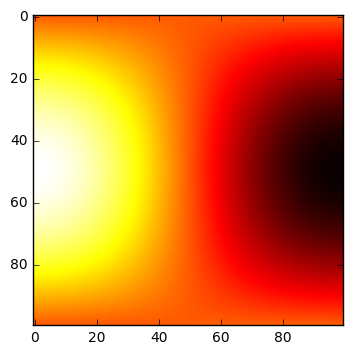

In [6]:
plt.imshow(phi[0, :, :], cmap='hot')
plt.show()

In [7]:
phi[0, :, :]

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -0.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [  3.17279324e-02,   3.17119583e-02,   3.16640548e-02, ...,
         -3.16640548e-02,  -3.17119583e-02,  -3.17279324e-02],
       [  6.34239167e-02,   6.33919910e-02,   6.32962286e-02, ...,
         -6.32962286e-02,  -6.33919910e-02,  -6.34239167e-02],
       ..., 
       [  6.34239167e-02,   6.33919910e-02,   6.32962286e-02, ...,
         -6.32962286e-02,  -6.33919910e-02,  -6.34239167e-02],
       [  3.17279324e-02,   3.17119583e-02,   3.16640548e-02, ...,
         -3.16640548e-02,  -3.17119583e-02,  -3.17279324e-02],
       [  1.22464685e-16,   1.22403024e-16,   1.22218119e-16, ...,
         -1.22218119e-16,  -1.22403024e-16,  -1.22464685e-16]], dtype=float32)

In [8]:
lambda_y = lambda_ys[0]

for k in range( Nt):
    for i in {0, Nx - 1}:
            x = xs[i]
            t = ts[k]
            phi[k, i, :] = phi_0 * np.cos(np.pi * x) * np.sin(np.pi * ys) * np.exp(-(lambda_x + lambda_y) * np.pi ** 2 * t)

In [9]:
gauss_seidel_solve_heat_eq(phi, lambda_x, lambda_y, dx, dy, dt, py_n_iters="adaptive", rmse_epsilon=1e-8)

Finished timestep 1 after 43 iterations, adaptive rmse 8.616372132549637e-09
Finished timestep 2 after 43 iterations, adaptive rmse 9.780036691699736e-09
Finished timestep 3 after 43 iterations, adaptive rmse 8.463715669801741e-09
Finished timestep 4 after 43 iterations, adaptive rmse 8.353380430942816e-09
Finished timestep 5 after 43 iterations, adaptive rmse 9.560255990476104e-09
Finished timestep 6 after 43 iterations, adaptive rmse 9.055249705949565e-09
Finished timestep 7 after 43 iterations, adaptive rmse 8.97595651319701e-09
Finished timestep 8 after 43 iterations, adaptive rmse 8.231103320285391e-09
Finished timestep 9 after 43 iterations, adaptive rmse 8.920987956250813e-09
Finished timestep 10 after 43 iterations, adaptive rmse 8.212645904874703e-09
Finished timestep 11 after 43 iterations, adaptive rmse 9.364307264010719e-09
Finished timestep 12 after 43 iterations, adaptive rmse 7.266237035367987e-09
Finished timestep 13 after 43 iterations, adaptive rmse 9.842754536138967e

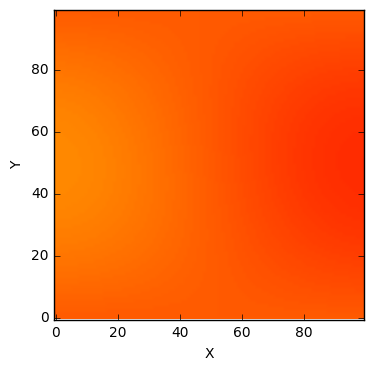

In [10]:
import matplotlib.animation as animation

fig = plt.figure()

curr_t = 0
im = plt.imshow(phi[curr_t, :, :].T, cmap='hot', animated=True, origin="lower")
plt.xlabel("X")
plt.ylabel("Y")


def updatefig(*args):
    global curr_t
    curr_t += 1
    im.set_array(phi[curr_t, :, :].T)
    return im,


ani = animation.FuncAnimation(fig, updatefig, 990, blit=True)
ani.save("video.mp4", fps=100, bitrate=768 * 1024)